# 1. Setup

In [1]:
# Gym stuff
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C, PPO
from stable_baselines3.a2c import MlpPolicy
from stable_baselines3.ppo import MlpPolicy

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# 2. Bring Marketwatch GME Data
https://www.marketwatch.com/investing/stock/gme/download-data?startDate=11/1/2019&endDate=03/12/2021

In [2]:
# load up dataset for anytrading environment
df = pd.read_csv('data/gmedata.csv')
# change date column to datetime
df['Date'] = pd.to_datetime(df['Date'])
# sort dates so that the oldest date comes first
df.sort_values('Date', ascending=True, inplace=True)
df.set_index('Date',inplace=True)
display(df.head())

,Open,High,Low,Close,Volume
Date,,,,,
2021-12-29,36.96,38.87,35.54,38.48,"8,149,624"
2021-12-30,37.75,40.00,37.50,38.83,"6,247,528"
2021-12-31,38.41,39.18,37.03,37.10,"5,575,856"
2022-01-03,37.31,39.85,37.30,38.21,"5,668,004"
2022-01-04,38.04,38.25,35.76,37.23,"7,339,576"


In [3]:
# setup stocks envirionment
# df is the df passed in
# use first 100 time stamps starting from 10\
# window_size = how many previous timestamps the bot will have before making next prediction
# here you use 95 days of data
window_size = 5
env = gym.make('stocks-v0',df=df,frame_bound=(window_size,100), window_size=window_size)

# 3. Build Environment

In [4]:
# there are 2 actions, buy or sell
env.action_space

Discrete(2)

info {'total_reward': -9.579999999999991, 'total_profit': 0.4784944356321396, 'position': 1}


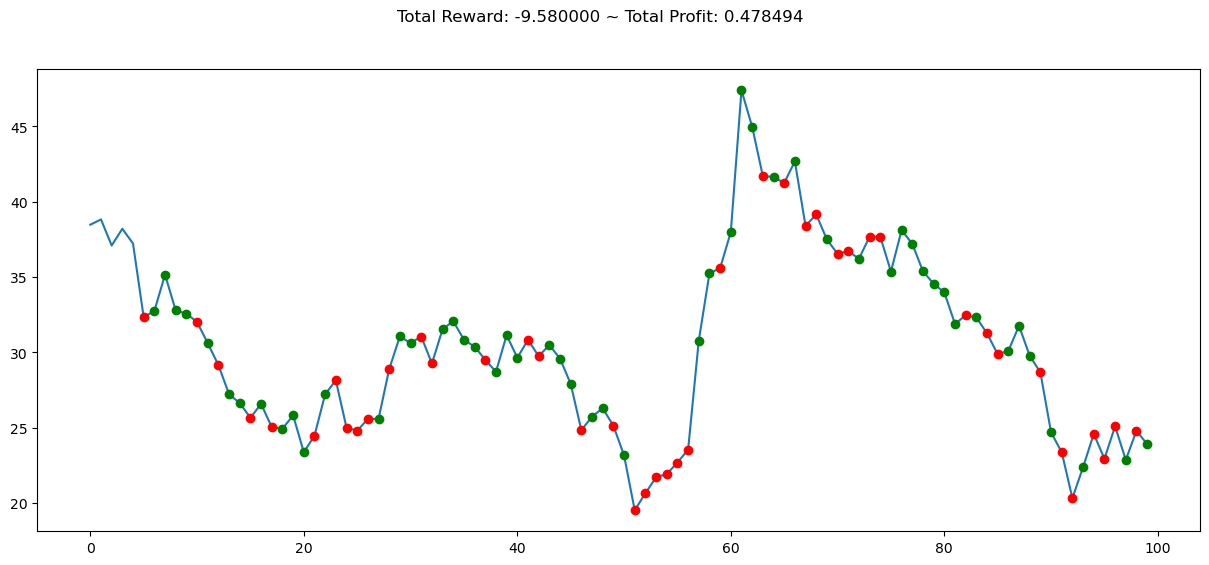

In [5]:
# create test env
state = env.reset()
while True:
    # take a random action from the action space
    # store action in action variable
    action = env.action_space.sample()
    # n_state = what env looks like
    # reward = any money made
    n_state, reward, done, info = env.step(action)
    if done:
        print('info',info)
        break
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
# green = buy
# red = short
plt.show()

# 4. Build Environment & Trade

In [6]:
# there is a generic env but there are also forex ones
env_maker = lambda: gym.make('stocks-v0',df=df,frame_bound=(window_size,100), window_size=window_size)
env = DummyVecEnv([env_maker])
# env = gym.make('stocks-v0',df=df,frame_bound=(window_size,100), window_size=window_size)

In [7]:
# A2C is the algorithm
# custom algorithms can be used
# multi layer perceptron lstm policy
    # deep neural network w/ lstm layer
    # lstm layer allows the ai to take into account what it has learned in the previous windows
model = A2C(MlpPolicy,env)
# explained variance should be as high as possible
# callback can be configured w/i learn model to stop learning once a ceratin level of variance is reached
# callback can be put w/i the learn function to stop the model at a certain metric
model.learn(total_timesteps=100000)

# 5. Evaluation

In [8]:
env = gym.make('stocks-v0', df=df, frame_bound=(100,len(df)), window_size=5)
obs = env.reset()
while True: 
    # reshape observations to work w/i non-vectorized env
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 0.0, 'total_profit': 0.8100478465679676, 'position': 1}


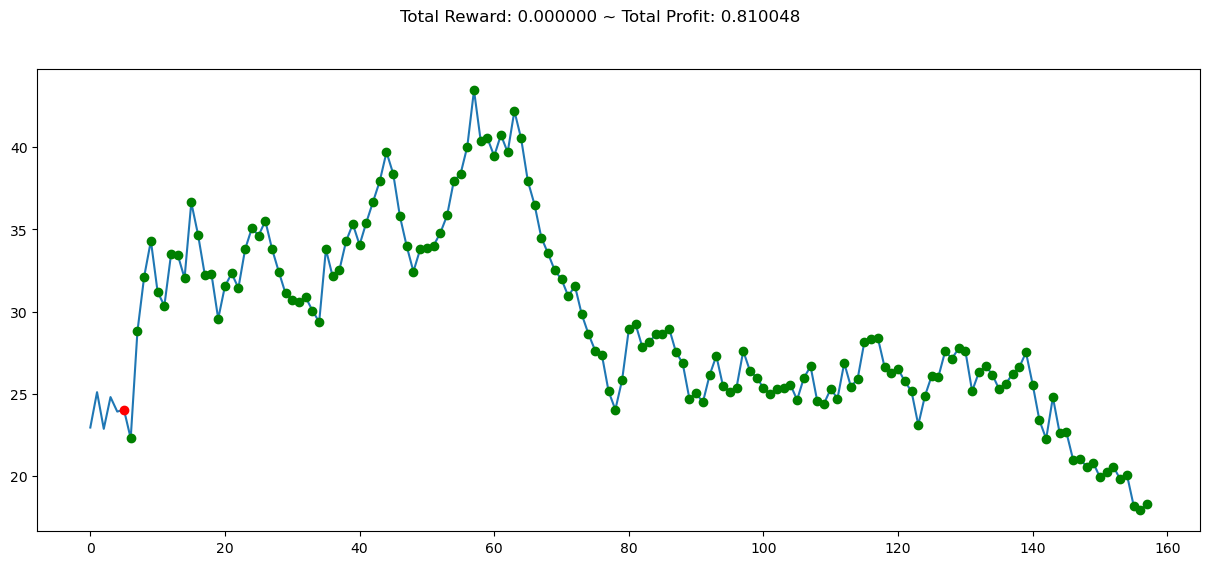

In [9]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()